# Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача:
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', 0) #благодаря этой строке мы увидим все содержимое строк
hypothesis.columns = hypothesis.columns.str.lower() #приведем название всех столбцов к строчному написанию

In [2]:
#считаем индекс ICE и RICE и добавляем в таблицу
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [3]:
#выводим дважды таблицу и сортируем ее сначала по ICE, затем по RICE
display(hypothesis.sort_values(by='ice', ascending=False))
display(hypothesis.sort_values(by='rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Результаты приоритизации по ICE и RICE разные. Самые значительные изменения произошли в двойке лидеров - она изменилась полностью. Методика RICE использует данные ICE, а также показатель охвата аудитории предлагаемым изменением, вследствие чего, акция на день рождения (который, как известно, только раз в году) и добавление 2 новых каналов привлечения гораздо менее интересны в сравнении с добавлением формы подписки на все основные страницы и блока рекомендуемых товаров, которые охватят практически всю аудиторию.

**Вывод:** метод RICE является модификацией метода ICE и, при возможности объективной оценки потенциального охвата предлагаемых именений, следует использовать именно его. Так, запуск акции на день рождения, при всей привлекательности, не может привлечь такую же аудитория как форма подписки с предложением, например, небольшой разовой скидки или оповещения об акциях интернет-магазина.

## Анализ A/B-теста

Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv. Проанализируйте A/B-тест.

In [4]:
#загрузим данные и выведем таблицы на экран
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

display(orders)
display(visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [5]:
#приведем названия столбцов к строчному формату, поменяем тип данных в столбце date, проверим на наличие дублей и
#проверим за какой срок нам предоставлены данные
orders.columns = orders.columns.str.lower()
orders['date'] = pd.to_datetime(orders['date'], infer_datetime_format=True).dt.date
print('Полных дублей', orders.duplicated().sum())
print('Дублей по transactionid', orders['transactionid'].duplicated().sum())
print(orders['date'].min(), orders['date'].max())

display(orders)
orders.info()

Полных дублей 0
Дублей по transactionid 0
2019-08-01 2019-08-31


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Таблица с заказами обработана. Сделаем то же самое с таблицей посещений.

In [6]:
visitors.columns = visitors.columns.str.lower()
visitors['date'] = pd.to_datetime(visitors['date'], infer_datetime_format=True).dt.date
print('Полных дублей', visitors.duplicated().sum())
print(visitors['date'].min(), visitors['date'].max())

display(visitors)
visitors.info()

Полных дублей 0
2019-08-01 2019-08-31


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Данные готовы к анализу.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [7]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))
cumulativeData.info()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 61
Data columns (total 6 columns):
date        62 non-null object
group       62 non-null object
orders      62 non-null int64
buyers      62 non-null int64
revenue     62 non-null int64
visitors    62 non-null int64
dtypes: int64(4), object(2)
memory usage: 3.4+ KB


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


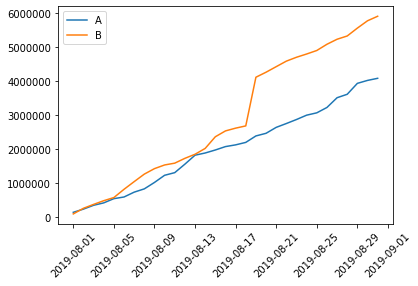

In [8]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.legend();

До 18 числа обе группы идут практически вровень, а после группа В резко вырывается вперед, далее обе группы изначальную динамику. Почти наверняка можно говорить о наличии всплеска числа заказов, либо о появлении очень дорогих заказов в выборке, мы проверим это позже.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

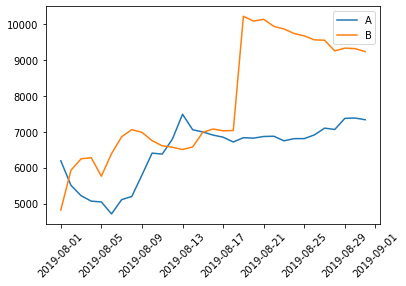

In [9]:
#для расчета среднего чека разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.legend();

Снова видим резкий скачок линии группы В. После 18 числа увеличилась не только выручка, но и средний чек, а значит в данные определенно попала аномалия. Единичный, но крайне дорогостоящий заказ?

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

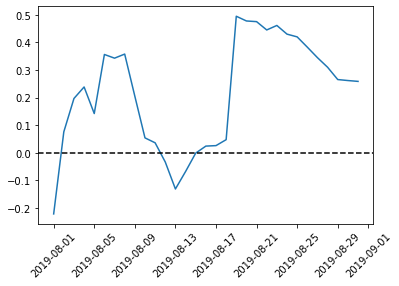

In [10]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--');

На графике относительного изменения кумулятивного среднего чека группы B к группе A видим колебания в первой половине месяца, резкий рывок вверх 18 августа, далее нисходящая траектория и стабилизация в последние дни месяца. Если игнорировать выбросы и резкие колебания, сложно говорить о превосходстве какой либо из групп. Необходимы дальнейшие исследования.

### Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

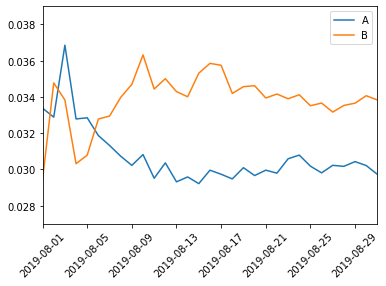

In [11]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.legend()

# задаем масштаб осей (минимальное и максимальное значения оси x; минимальное и максимальное значения оси y)
plt.axis(["2019-08-01", '2019-08-31', 0.027, 0.039]);

А вот в конверсии группа В определенно превосходит группу А. После стабилизации графика наблюдается преимущество группы В на 10-15% по сравнению с группой А. 

### Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

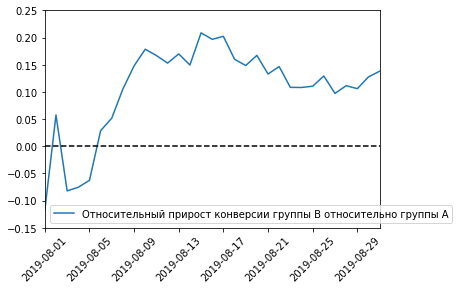

In [12]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xticks(rotation=45)
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.15, 0.25]);

Данный график отлично показывает более высокую конверсию в группе В в сравнении с группой А. Начиная с 08 августа группа В показывает лучший результат. Осталось только подтвердить преимущество группы В в конверсии статистически.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

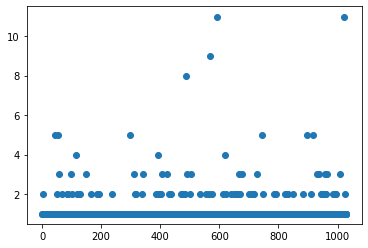

In [13]:
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorid', 'orders']

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

На графике видно что большинство покупателей делают только 1 заказ, а клиенты с 4 заказами и более вообще редкость и скорее всего не более чем аномалии. Проверим. 

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [14]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
print()
print(np.percentile(ordersByUsers['orders'], [95, 99]))

       visitorid  orders
1023  4256040402  11    
591   2458001652  11    
569   2378935119  9     
487   2038680547  8     
44    199603092   5     
744   3062433592  5     
55    237748145   5     
917   3803269165  5     
299   1230306981  5     
897   3717692402  5     

[2. 4.]


Действительно, 95% пользователей сделали 2 и менее заказа. Примем за аномальных клиентов всех кто сделал более 3-х заказов.

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

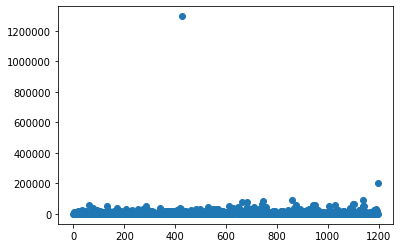

In [15]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);

В то время как большинство заказов расположились ниже 50 000, на графике явно видно 2 выброса стоимостью примерно 200 000 и 1 300 000, которые определенно искажают общую картину. Посмотрим на график поближе.

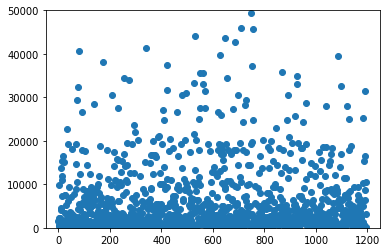

In [25]:
plt.scatter(x_values, orders['revenue'])
plt.axis([-50, 1250, 0, 50000]);

Увеличив масштаб сразу видно где начинаются выбросы - заказы свыше 25000 встречаются значительно реше прочих. Но прежде чем принимать решение, посмотрим на перцентили.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [16]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Заказы стоимостью 200 000 и 1 300 000 определенно являются аномалиями, учитывая то что 95% заказов не дотягивает и до 30 000. Примем за аномальных всех кто сделал заказ более чем на 30 000.

### Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [22]:
#построим "супертаблицу" и в дальнейшем из нее будем брать данные для статистических расчетов
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

#соберем данные в 1 таблицу и посмотрим на результат
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5)) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Общая таблица готова. Теперь подготовим выборку А и В для проверки статистически значимых различий между ними.

Установим уровень статистической значимости (альфа) 0.05. Будем пользоваться тестом Манна-Уитни. Нулевой гипотезой (Н0) будет равенство выборки А и В то есть равенство конверсий в группах А и В, а альтернативной (Н1) - то что они отличаются.

Н0 = p-value > 0.05

Н1 = p-value < 0.05

Также вычислим прирост средней конверсии группы B по сравнению с средней конверсией группой А.

In [18]:
#сгрупируем пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

#объявим переменные sampleA и sampleB в которых пользователям из разных групп будет соответствовать количество заказов, 
#тем, кто ничего не заказал, будут соответствовать нули, это необходимо для проверки критерием Манна-Уитни

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост конверсии группы B (данные с аномалиями): {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.008
Относительный прирост конверсии группы B (данные с аномалиями): 0.138


p-value ниже уровня альфа. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Что позволяет на данном этапе считать конверсию группы В выше конверсии группы А. Относительное преимущество группы B в сравнении с группой А равно 13.8%. Окончательные выводы о конверсии всё же следует делать по данным без выбросов.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Аналогично проверке конверсии, проверим наличие ститестически значимого различия между выборками с суммами среднего чека.
Нулевой гипотезой (Н0) будет равенство выборок А и В, а альтернативной (Н1) - то что они отличаются.

Н0 = p-value > 0.05

Н1 = p-value < 0.05

ТАкже вычислим отношение суммы среднего чека группы B к среднему чеку группы А.

In [19]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B: {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.365
Относительный прирост среднего чека группы B: 0.259


р-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При верности нулевой гипотезы мы имеем разницу среднего чека группы B в сравнении с группой A 25.9%. 

Эти утверждения противоречат друг другу. Как и было установлено ранее, в данных по среднему чему определенно есть выбросы. Так что окончательное решение следует сделать только после удаления аномалий.

### Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [26]:
#создадим список пользователей с аномальными заказами
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorid'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#отфильтруем из выборок аномальных пользователей
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

#проверим статистическое различие выборок и отношение средней конверсии по аналогии с "сырыми" данными
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост конверсии группы B (без аномальных заказов): {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.009
Относительный прирост конверсии группы B (без аномальных заказов): 0.148


p-value нижу уровня альфа (0.05). Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Результат не изменился после обработки аномальных данных, а относительный прирост конверсии группы B даже увеличился (14.9% против 13.8% в данных с выбросами).

Можно смело утверждать что после введения изменений конверсия увеличилась почти на 15%!

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [21]:
#проверим статистическое различие выборок и отношение среднего чека по аналогии с "сырыми" данными
print(
    'p-value = {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B (без аномальных заказов): {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value = 0.479
Относительный прирост среднего чека группы B (без аномальных заказов): -0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, по прежнему нет. Тем не менее, после удаления выбросов преимущество группы В в величине среднего чека пропало и группа А даже вышла вперед на 2%. Средние чеки равны в группах, больше нет никакого противоречия.

### Примите решение по результатам теста и объясните его. 
Варианты решений:
- Остановить тест, зафиксировать победу одной из групп.
- Остановить тест, зафиксировать отсутствие различий между группами.
- Продолжить тест.

Проанализировав результаты А/В-теста мы имеем следующие факты:
- График кумулятивной выручки позволяет сделать вывод что выручка в группе В выше чем в группе А
- График кумулятивного среднего чека показывает то преимущество группы А то группы В, тем не менее группа В чаще показывает более высокие результаты и после нисходящего тренда стабилизируется
- График конверсии явно свидетельствует о более высокой конверсии у группы В
- Конверсия в группе В выше чем в группе А примено на 15%. Различие наблюдается как в сырых данных так и по данным после обработки, уровень статистической значимости также достигнут
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. В абсолютных величинах в отфильтрованных данных по среднему чеку также различия незначительные. 
- В сырых данных средний чек группы В значительно превышает средний чек группы А (примерно на 25%). Пусть в ходе данного исследования и невозможно подтвердить являются ли аномалии результатом изменений и будут ли характерны для заказов после применения изменений, существует такая потенциальная возможность. 

Исходя из вышеизложенных фактов, тест следует остановить тест, зафиксировать победу группы В. Применив изменения, протестированные на группе В, мы получим увеличение выручки за счет увеличения конверсии и при том же уровне среднего чека, а возможно, привлечем дополнительные крупные заказы.